# Data Cleaning

Clean and validate the merged dataset:
1. Load merged data
2. Handle missing values
3. Remove duplicates
4. Fix data types
5. Remove invalid entries
6. Save cleaned dataset

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

%matplotlib inline

## 1. Load Merged Data

In [2]:
df = pd.read_pickle('../data/processed/merged_data.pkl')
print(f"Loaded dataset: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Loaded dataset: (19222, 68)
Memory usage: 100.13 MB


## 2. Check Missing Values

In [3]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing': missing,
    'Percentage': missing_pct
})
missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False).head(20)

,Missing,Percentage
Open Access,11794,61.36
Source type,3834,19.95
Scopus Author ID Corresponding Author,3828,19.91
All Science Journal Classification (ASJC) field name,3828,19.91
All Science Journal Classification (ASJC) code,3828,19.91
Number of Countries/Regions,3828,19.91
Country/Region,3828,19.91
Scopus Author ID Single Author,3828,19.91
Scopus Author ID Last Author,3828,19.91
Quacquarelli Symonds (QS) Subject area field name,3828,19.91


## 3. Handle Critical Missing Values

In [4]:
print(f"Records before cleaning: {len(df)}")

df_clean = df[
    df['EID'].notna() &
    df['Abstract'].notna() &
    df['Citations'].notna() &
    df['Year'].notna() &
    df['Authors'].notna()
].copy()

print(f"Records after removing rows with missing critical fields: {len(df_clean)}")
print(f"Removed: {len(df) - len(df_clean)} records")

Records before cleaning: 19222
Records after removing rows with missing critical fields: 15394
Removed: 3828 records


## 4. Remove Duplicates

In [5]:
print(f"Duplicate EIDs: {df_clean['EID'].duplicated().sum()}")

df_clean = df_clean.drop_duplicates(subset='EID', keep='first')

print(f"Records after removing duplicates: {len(df_clean)}")

Duplicate EIDs: 0
Records after removing duplicates: 15394


## 5. Fix Data Types

In [6]:
df_clean['Year'] = df_clean['Year'].astype(int)
df_clean['Citations'] = df_clean['Citations'].astype(int)
df_clean['Views'] = df_clean['Views'].astype(int)

print("Data types fixed:")
print(f"Year: {df_clean['Year'].dtype}")
print(f"Citations: {df_clean['Citations'].dtype}")
print(f"Views: {df_clean['Views'].dtype}")

Data types fixed:
Year: int64
Citations: int64
Views: int64


## 6. Remove Invalid Entries

In [7]:
print(f"Records before validation: {len(df_clean)}")

df_clean = df_clean[
    (df_clean['Year'] >= 2000) &
    (df_clean['Year'] <= 2025) &
    (df_clean['Citations'] >= 0) &
    (df_clean['Abstract'].str.len() > 50)
]

print(f"Records after validation: {len(df_clean)}")
print(f"Removed invalid entries: {len(df) - len(df_clean)}")

Records before validation: 15394
Records after validation: 14832
Removed invalid entries: 4390


## 7. Check Abstract Quality

Abstract length statistics:
count    14832.000000
mean      1516.970402
std        563.092336
min         98.000000
25%       1141.000000
50%       1503.000000
75%       1837.250000
max       9941.000000
Name: abstract_length, dtype: float64


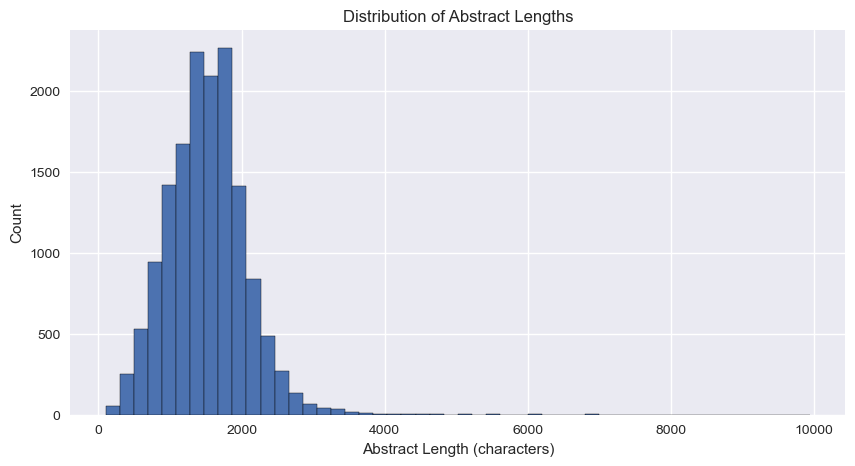

In [8]:
df_clean['abstract_length'] = df_clean['Abstract'].str.len()

print("Abstract length statistics:")
print(df_clean['abstract_length'].describe())

plt.figure(figsize=(10, 5))
plt.hist(df_clean['abstract_length'], bins=50, edgecolor='black')
plt.xlabel('Abstract Length (characters)')
plt.ylabel('Count')
plt.title('Distribution of Abstract Lengths')
plt.show()

df_clean = df_clean.drop('abstract_length', axis=1)

## 8. Summary Statistics

In [9]:
print("=" * 50)
print("CLEANED DATASET SUMMARY")
print("=" * 50)
print(f"Total records: {len(df_clean)}")
print(f"Total columns: {len(df_clean.columns)}")
print(f"Memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nYear range: {df_clean['Year'].min()} - {df_clean['Year'].max()}")
print(f"Citations range: {df_clean['Citations'].min()} - {df_clean['Citations'].max()}")
print(f"Median citations: {df_clean['Citations'].median():.0f}")
print(f"Mean citations: {df_clean['Citations'].mean():.2f}")

CLEANED DATASET SUMMARY
Total records: 14832
Total columns: 68
Memory usage: 91.28 MB

Year range: 2010 - 2025
Citations range: 0 - 66291
Median citations: 10
Mean citations: 35.62


## 9. Save Cleaned Dataset

In [10]:
output_csv = Path('../data/processed/cleaned_data.csv')
output_pkl = Path('../data/processed/cleaned_data.pkl')

df_clean.to_csv(output_csv, index=False)
df_clean.to_pickle(output_pkl)

print(f"Cleaned data saved to:")
print(f"  CSV: {output_csv}")
print(f"  Pickle: {output_pkl}")

Cleaned data saved to:
  CSV: ..\data\processed\cleaned_data.csv
  Pickle: ..\data\processed\cleaned_data.pkl
